In [82]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

## 1.1 读取多个时次的模式预报数据 TEMP

In [84]:
%time
directory850 = "ECMWF_HR/HGT/850"
directory500 = "ECMWF_HR/HGT/500"
fhours = np.arange(0, 120, 24)
filenames = ['22062420.'+'%03d'%(fhour) for fhour in fhours]
H850 = get_model_grids(directory850, filenames, varname='hgt', varattrs={'long_name':'850hPa HGT', 'units':'m'}, cache=False)
H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, cache=False)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [85]:
H500

<xarray.Dataset>
Dimensions:                  (time: 5, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
  * level                    (level) float32 500.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-24T20:00:00
    forecast_period          (time) float64 0.0 24.0 48.0 72.0 96.0
Data variables:
    hgt                      (time, level, lat, lon) float32 586.3 ... 567.2
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

<xarray.DataArray 'hgt' (time: 5, lat: 120, lon: 160)>
array([[[439.2531 , 439.12808, 439.06558, ..., 437.8031 , 437.82806,
         437.84064],
        [439.40308, 439.3031 , 439.19058, ..., 437.6906 , 437.81558,
         437.8781 ],
        [439.56558, 439.4781 , 439.34058, ..., 437.57806, 437.65308,
         437.7531 ],
        ...,
        [434.49057, 435.39062, 436.1156 , ..., 427.07812, 427.0656 ,
         427.11563],
        [434.8406 , 436.1281 , 436.65308, ..., 427.1781 , 427.0656 ,
         427.12808],
        [434.8156 , 436.29062, 436.26562, ..., 427.32812, 427.1656 ,
         427.10312]],

       [[439.8486 , 439.7611 , 439.6861 , ..., 437.2486 , 437.1861 ,
         437.11108],
        [440.06107, 439.9986 , 439.8736 , ..., 437.27362, 437.24857,
         437.1486 ],
        [440.2361 , 440.1986 , 440.04858, ..., 437.28607, 437.26108,
         437.16107],
...
        [435.80197, 436.70197, 437.41443, ..., 428.88947, 428.91446,
         428.96445],
        [435.91443, 437.17

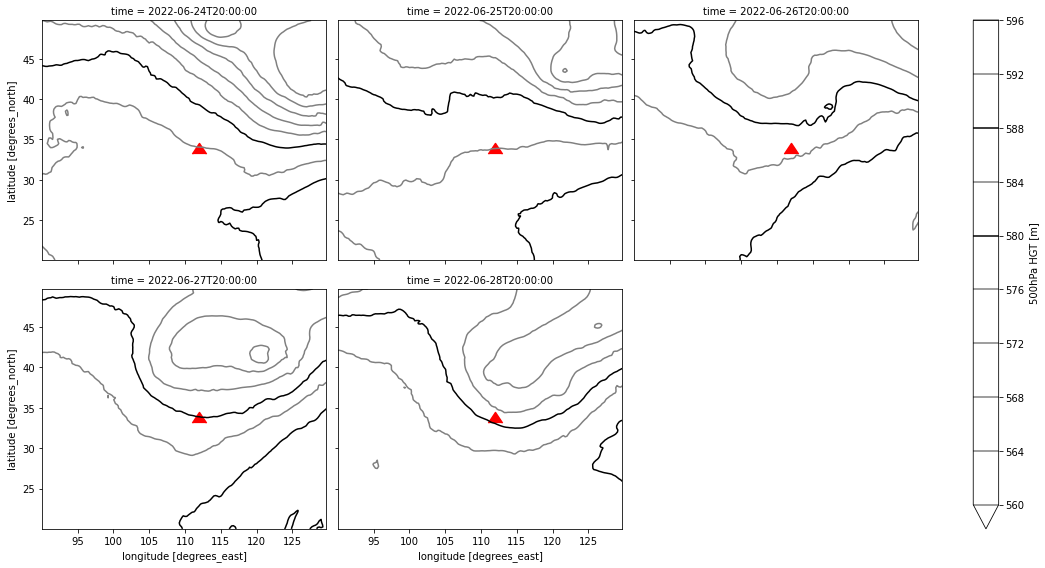

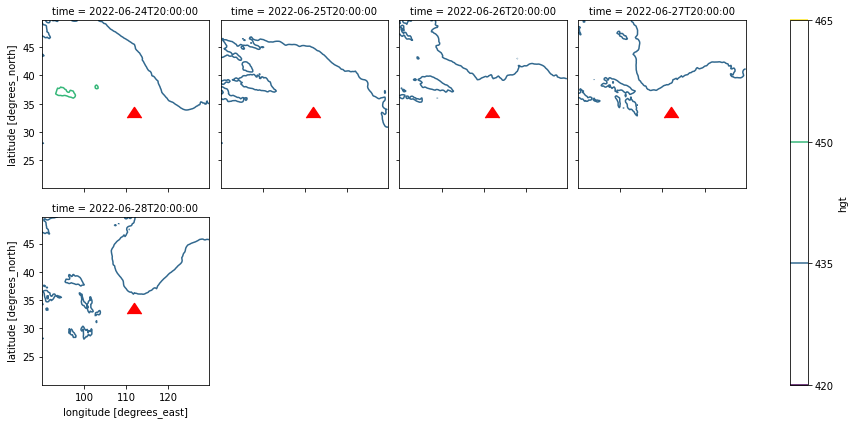

In [86]:
# 绘制图像
left = 90
right=130
top = 50
bottom = 20

H850 = H850.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")
H500 = H500.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

H500colors = ['gray']*10
H500colors[-3] = H500colors[-5] = 'black'

p = H500.plot.contour(figsize=(16, 8), col='time', col_wrap=3, levels=np.arange(560,600,4), colors = H500colors, add_colorbar=True) #[24, 28]

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)



H500_850 = H500 - H850
print(H500_850)

p = H500_850.plot.contour(col='time', col_wrap=4, levels=3,add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

## 1.2 Draw High Plot

In [87]:
level = '500'
plot500 = get_station_data(f"UPPER_AIR/PLOT/{level}", "20220626080000.000", dropna=True, cache=False)
plot500

,ID,lon,lat,Alt,Dewpoint_depression,Geopotential_hight,Temp,Wind_angle,Wind_speed,time
0,47104,128.850006,37.799999,80.000000,6.000000,582.000000,-9.3,235.0,29.0,2022-06-26 08:00:00
1,83971,-51.180000,-30.000000,3.000000,27.000000,579.000000,-12.7,255.0,28.0,2022-06-26 08:00:00
2,55299,92.059998,31.480000,4508.299805,2.200000,585.700012,-1.1,42.0,5.2,2022-06-26 08:00:00
3,26629,23.830000,54.880001,76.000000,17.000000,583.000000,-11.9,145.0,5.0,2022-06-26 08:00:00
4,72712,-68.000000,46.869999,191.000000,29.000000,585.000000,-8.1,325.0,4.0,2022-06-26 08:00:00
...,...,...,...,...,...,...,...,...,...,...
424,22522,34.650002,64.949997,8.000000,7.000000,579.000000,-12.7,315.0,17.0,2022-06-26 08:00:00
425,58362,121.440002,31.389999,6.700000,28.700001,587.900024,-4.1,253.0,5.5,2022-06-26 08:00:00
426,30715,103.849998,52.480000,436.000000,10.000000,573.000000,-11.9,340.0,9.0,2022-06-26 08:00:00
427,96253,102.330002,-3.880000,16.000000,NaN,NaN,NaN,330.0,2.0,2022-06-26 08:00:00


In [88]:
plot500 = plot500.dropna(how='any')
plot500 = plot500[(bottom <= plot500['lat']) & (plot500['lat'] <= top) &
                    (left <= plot500['lon']) & (plot500['lon'] <= right)]


/tmp/ipykernel_4383/3534319240.py:8: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, add_colorbar=True)


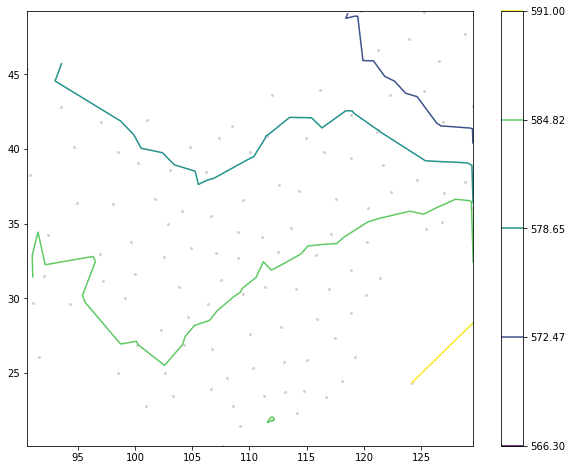

In [89]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

#levels = [564, 572, 580, 588]
levels = np.linspace( plot500.Geopotential_hight.min(), plot500.Geopotential_hight.max(), 5 )

ax.plot(plot500.lon, plot500.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, add_colorbar=True)

fig.colorbar(cntr, ax=ax)

## 1.3 Draw High Diff

In [90]:
dti = pd.date_range("2022-06-24 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")

""" 
BEIJING_MR/HGT/500/22062420.000 
"ECMWF_HR/HGT/500"
GRAPES_GFS/HGT/500/22062420.000
"GERMAN_HR/GEOPOTENTIAL/500"
JAPAN_MR/HGT/500/22062420.000
NCEP_GFS_HR/HGT/500/22062408.000

SHANGHAI_MR/HGT/500/22062420.000
"""
directory500 = f'ECMWF_HR/HGT/{level}'
fhours = np.arange(36, 12*6 + 36, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, allExists=False, cache=False)

H500

2022-06-24 20:00:00    22062420.036
2022-06-24 08:00:00    22062408.048
2022-06-23 20:00:00    22062320.060
2022-06-23 08:00:00    22062308.072
2022-06-22 20:00:00    22062220.084
2022-06-22 08:00:00    22062208.096
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-26T08:00:00 ... 20...
  * level                    (level) float32 500.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
    forecast_period          (time) float64 36.0 48.0 60.0 72.0 84.0 96.0
Data variables:
    hgt                      (time, level, lat, lon) float32 585.1 ... 566.4
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

6


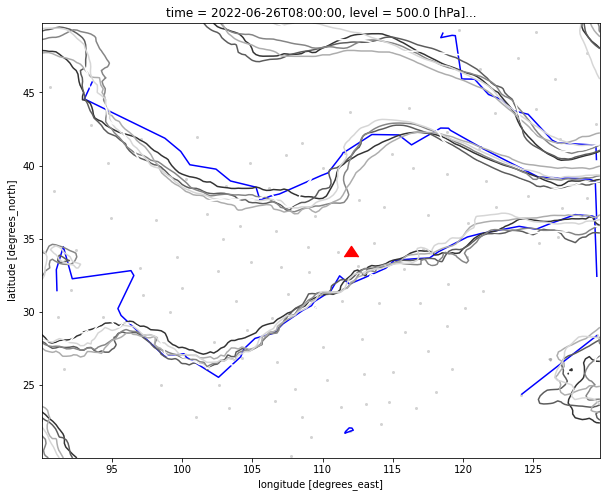

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(plot500.lon, plot500.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, colors = 'blue') #add_colorbar=True

#fig.colorbar(cntr, ax=ax)
ax.scatter(112, 34.5, s=200, c='red', marker=6)

H500Area = H500.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

print(H500Area.shape[0])
for index in range(0,H500Area.shape[0]):
    colors = index/5 * (1-0.2) + 0.2
    H500Area.isel(time=index).plot.contour(ax = ax, levels=levels, colors = str(colors) )
    pass


In [92]:
['gray']*6

['gray', 'gray', 'gray', 'gray', 'gray', 'gray']